In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
titanic_data=pd.read_csv("C:/Users/DNYANESHWARI/celebal COE/titanic/train.csv")

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

embarked :	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [27]:
titanic_data.shape

(891, 12)

In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
# handle the missing values

# drop the cabin columns from the dataframe
titanic_data=titanic_data.drop(columns=['Cabin'],axis=1)

In [31]:
# let us replace the missing age with the mean age

titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [35]:
# replace the missing values in embarked with the value that is repeated most number of times (mode)

# find the mode
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [36]:
titanic_data['Embarked'].mode()[0]

'S'

In [37]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [38]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [39]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# find no of people survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Survivors and Non-Survivors')

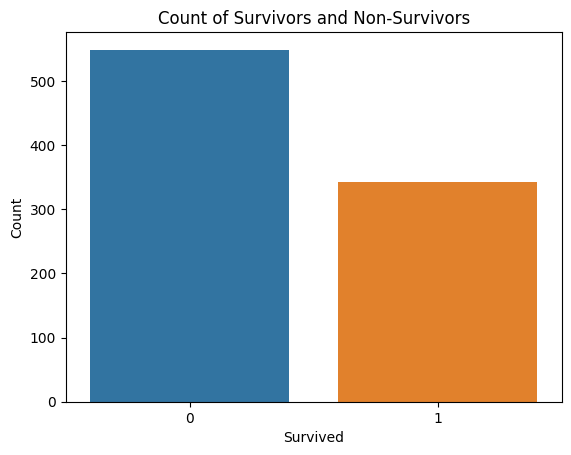

In [48]:
sns.countplot(data=titanic_data, x='Survived')

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Count of Survivors and Non-Survivors')

In [51]:
# let us count total males and females
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of gender-wise passengers')

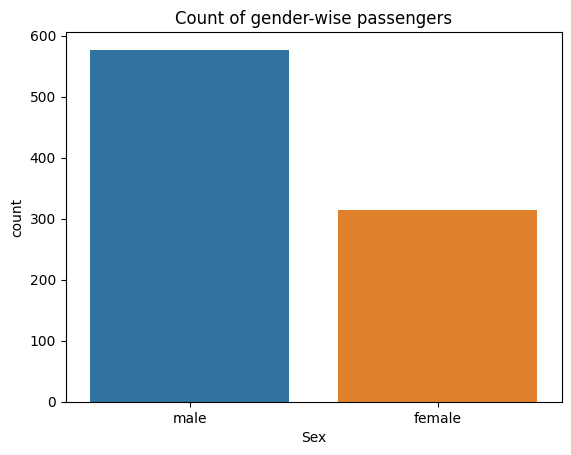

In [52]:
sns.countplot(data=titanic_data, x='Sex')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('count')
plt.title('Count of gender-wise passengers')

Text(0.5, 1.0, 'Number of Survivors Gender-wise')

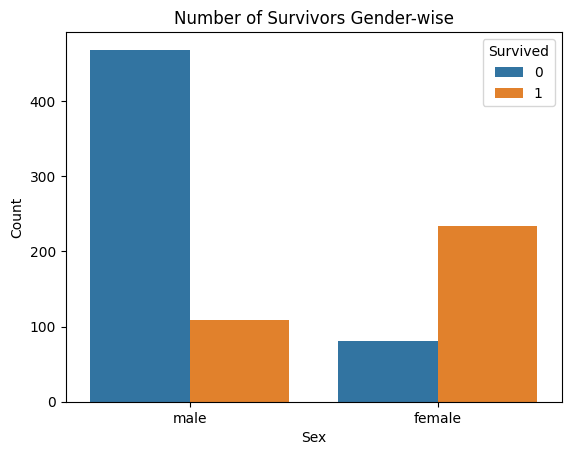

In [55]:
# no. of survivors gender wise
sns.countplot(data=titanic_data, x='Sex', hue='Survived')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Survivors Gender-wise')

Text(0.5, 1.0, 'class wise survivors')

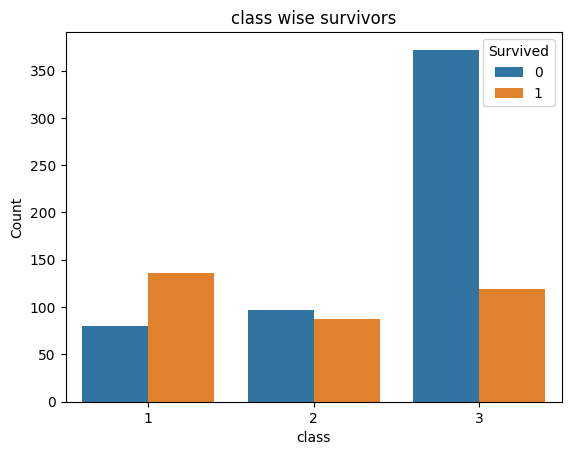

In [59]:
# making a count plot for Pclass
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')

# Adding labels and title
plt.xlabel('class')
plt.ylabel('Count')
plt.title('class wise survivors')


### Encoding the categorical columns

In [60]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [72]:
titanic_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)

In [73]:
titanic_data.replace({'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [74]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [75]:
# grab only required columns

data=titanic_data[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]


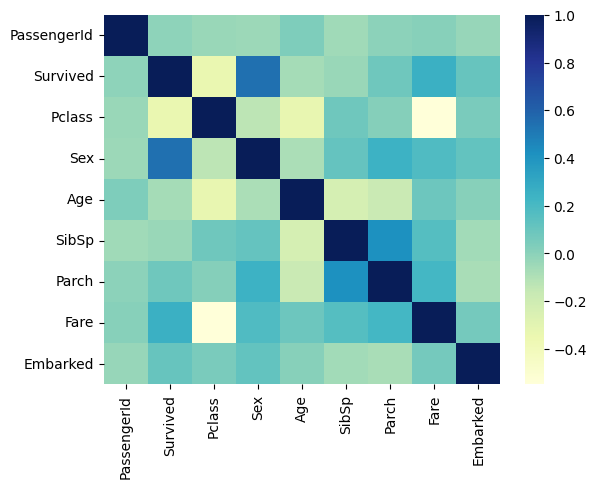

In [76]:
sns.heatmap(data.corr(),cmap='YlGnBu')
plt.show()

Inference from the heatmap

1.Pclass is negatively correlated to the Survived which means that higher the economic class, more is the chance of survival

2.Fare is positively correlated with the Survived which means that higher the fare price, indicating a person belonging to the upper class so more is the survival rate

3.Female passengers given the first preference while evacuation


In [85]:
from sklearn.model_selection import train_test_split

In [80]:
X=data.drop(columns=['Survived'],axis=1)
Y=data['Survived']

In [81]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.000000,1,0,7.2500,0
1,2,1,1,38.000000,1,0,71.2833,1
2,3,3,1,26.000000,0,0,7.9250,0
3,4,1,1,35.000000,1,0,53.1000,0
4,5,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.000000,0,0,13.0000,0
887,888,1,1,19.000000,0,0,30.0000,0
888,889,3,1,29.699118,1,2,23.4500,0
889,890,1,0,26.000000,0,0,30.0000,1


In [82]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [87]:
# splitting the data into train data and test data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [90]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [91]:
# model training
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()

In [93]:
# training a logistic regression model with training data
model.fit(X_train,Y_train)

C:\Users\DNYANESHWARI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
# evaluate the model
from sklearn.metrics import accuracy_score

In [98]:
X_train_predictions=model.predict(X_train)

In [100]:
# accuracy of training data
training_data_accuracy = accuracy_score(Y_train,X_train_predictions)

In [101]:
training_data_accuracy

0.8160112359550562

In [102]:
X_test_predictions=model.predict(X_test)

In [103]:
# accuracy score of test data
test_data_accuracy = accuracy_score(Y_test, X_test_predictions)

In [104]:
test_data_accuracy

0.776536312849162